In [ ]:
pip install pysam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 20.1 MB/s eta 0:00:00


In [ ]:
import pysam

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
def load_variants(vcf_file):
    variants = []
    with pysam.VariantFile(vcf_file) as vcf:
        for record in vcf:
            variants.append((record.chrom, record.pos, record.ref, record.alts))
    return variants

In [ ]:

from google.colab import files

In [ ]:

uploaded = files.upload()

Saving freebayes_unique_variants.vcf.gz to freebayes_unique_variants.vcf.gz
Saving gatk_unique_variants.vcf.gz to gatk_unique_variants.vcf.gz


In [ ]:
uploaded=files.upload()

Saving common_variants.vcf.gz to common_variants.vcf.gz


In [ ]:
ls

sample_data/


In [ ]:
common_variants = load_variants('common_variants.vcf.gz')

In [ ]:
freebayes_unique_variants = load_variants('freebayes_unique_variants.vcf.gz')

In [ ]:
gatk_unique_variants = load_variants('gatk_unique_variants.vcf.gz')

In [ ]:
TP = len(common_variants)

In [ ]:
TP

65104

In [ ]:
FP = len(freebayes_unique_variants)

In [ ]:
FP

98188

In [ ]:
FN = len(gatk_unique_variants)


In [ ]:
FN

5138

In [ ]:
precision = TP / (TP + FP)

In [ ]:
precision

0.625

In [ ]:
recall = TP / (TP + FN)

In [ ]:
recall

0.9268528800432789

In [ ]:
f_score = 2 * (precision * recall) / (precision + recall)

In [ ]:
f_score

0.5575547885960931

In [ ]:
print(f'True Positives: {TP}')
print(f'False Positives: {FP}')
print(f'False Negatives: {FN}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F-score: {f_score:.4f}')

True Positives: 65104
False Positives: 98188
False Negatives: 5138
Precision: 0.3987
Recall: 0.9269
F-score: 0.5576


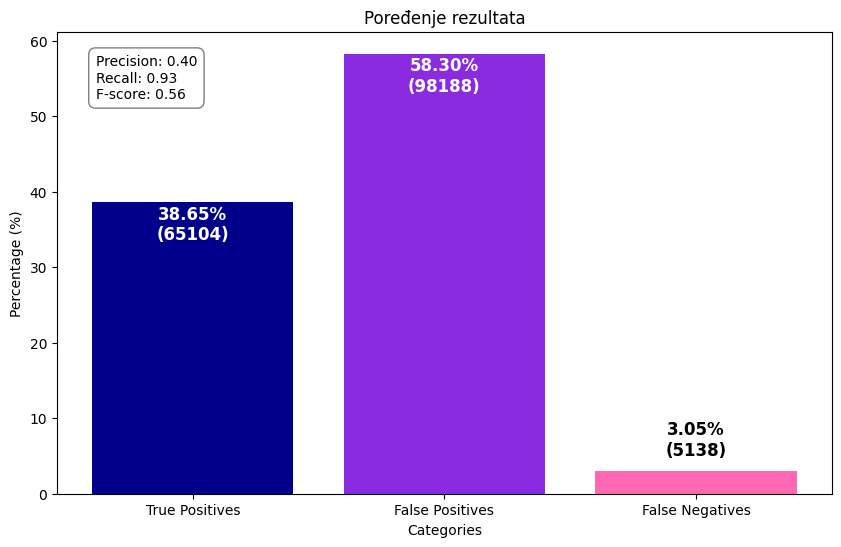

In [ ]:
import matplotlib.pyplot as plt

# Izračunavanje ukupnog broja i procenata
total = TP + FP + FN
counts = [TP, FP, FN]
labels = ['True Positives', 'False Positives', 'False Negatives']
percentages = [(count / total) * 100 for count in counts]

# Boje za stubiće
colors = ['darkblue', '#8A2BE2', 'hotpink']

# Izračunavanje metrika
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f_score = 2 * (precision * recall) / (precision + recall)

# Kreiraj graf
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, percentages, color=colors)

# Dodaj procente i tačne brojeve iznad stubića
for bar, percentage, count in zip(bars, percentages, counts):
    height = bar.get_height()
    if height < 5:  # Ako je stubić premali, stavi tekst iznad
        plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{percentage:.2f}%\n({count})', ha='center', color='black', fontsize=12, fontweight='bold')
    else:
        plt.text(bar.get_x() + bar.get_width() / 2, height - 5, f'{percentage:.2f}%\n({count})', ha='center', color='white', fontsize=12, fontweight='bold')

textstr = f'Precision: {precision:.2f}\nRecall: {recall:.2f}\nF-score: {f_score:.2f}'

# Pozicioniranje teksta na grafikon
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))

# Dodaj oznake i naslov
plt.xlabel('Categories')
plt.ylabel('Percentage (%)')
plt.title('Poređenje rezultata')

# Prikaz grafika
plt.show()

